# Task 1
## Process Model Derivartion
Considering the drone as a point mass $m$, the governing equation for the system is $u = mp̈$

Modeling the system as continous state-space model with states $x = \begin{bmatrix} p \\ ṗ \end{bmatrix} $ yields

\begin{equation}
\dot{x} = \begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix}x + \begin{bmatrix} 0 \\ \frac{1}{m} \end{bmatrix}u \\
\dot{x} = Ax + Bu
\tag{1}
\end{equation}

Here $A = \begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix}$ and $B = \begin{bmatrix} 0 \\ \frac{1}{m} \end{bmatrix}$

$ẋ$ can be written as

\begin{equation}
\dot{x} = \frac{x_{k+1} - x_{k}}{dt}
\tag{2}
\end{equation}

where $x_{k+1}$, $x_{k}$ are the next and current discrete states and $dt$ is the time step.

Equating (1) and (2)
\begin{equation}
\frac{x_{k+1} - x_{k}}{dt} = Ax_{k} + Bu \\
x_{k+1} = x_{k} + Ax_{k}dt + Budt \\
x_{k+1} = (I + Adt)x_{k} + (Bdt)u \\
\end{equation}
\begin{equation}
x_{k+1} = A_{d}x_{k} + B_{d}u
\tag{3}
\end{equation}

Here $A_{d} = I + Adt = \begin{bmatrix} 1 & dt \\ 0 & 1 \end{bmatrix}$ and $B_{d} = \begin{bmatrix} 0 \\ \frac{dt}{m} \end{bmatrix}$

# Task 2

In [118]:
def kalman_filter(x_prev,u_curr,P_prev,y_curr,dt,flag):
  """
  Estimates the state of the drone using the kalman filter algorithm

  Inputs:
    - x_prev: previous state (6X1 np.array)
    - u_curr: current input to the system (3X1 np.array)
    - P_prev: covariance matrix of state estimate at previuos time step (6X6 np.array)
    - y_curr: current measurement (3X1 np.array)
    - dt: timestep (seconds)
    - flag: To choose measurement matrix (True or False)
            * True  - Position measurement
            * False - Velocity measurement

  Outputs:
    - x: current state estimate (6X1 np.array)
    - P: updated covariance matrix of state estimate (6X6 np.array)

  """
  # init mass
  m = 0.027 # kg

  # init process matrices
  A = np.array([[1,0,0,dt,0,0],
                [0,1,0,0,dt,0],
                [0,0,1,0,0,dt],
                [0,0,0,1,0,0],
                [0,0,0,0,1,0],
                [0,0,0,0,0,1]])

  B = np.vstack((np.eye(3)*dt**2/(2*m),np.eye(3)*dt/m))

  # init measurement matrix
  if flag:
    # position measurements
    C = np.hstack((np.eye(3),np.zeros((3,3))))
  else:
    # velocity measurements
    C = np.hstack((np.zeros((3,3)),np.eye(3)))

  # init process noise
  Q = np.eye(6)
  # init measurement noise
  R = np.eye(3)

  # prediction
  # predict state
  x_pred = A @ x_prev + B @ u_curr
  # preditc uncertainity
  P_pred = A @ P_prev @ A.T + Q

  # update
  # compute kalman gain
  K = P_pred @ C.T @ np.linalg.inv(C @ P_pred @ C.T + R)
  # update estimate
  x= x_pred + K @ (y_curr - C @ x_pred)
  # update uncertainity
  P = (np.eye(6) - K @ C) @ P_pred

  return x,P

In [119]:
def kalman_loop(data):
  """
  Runs kalman filter on the array of data by looping over it
  """

In [120]:
def plot_3Dpos(x):
  """
  Creates a 3D plot of position given state array x
  Input:
    - x : 6XN state vector where N is the number of instances
  Output:
    - 3D line plot of the position from state vector x
  """
  # Create a 3D plot
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  # Scatter plot
  ax.plot(x[0,:], x[1,:], x[2,:])

  # Set axis labels
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')

  # Show the plot
  plt.show()


In [121]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# import data from txt file into np array
data = np.genfromtxt('kalman_filter_data_low_noise.txt', delimiter=',', dtype=None, encoding=None)

# var to store state
x = np.zeros((6,data.shape[0]))

# initial time
t_prev = data[0,0]

# initial position estimate
x[0:3,0] = data[0,4:]
# initial covariance/uncertainity
P_prev = 1*np.eye(6)

# loop over data
for i in range(1,data.shape[0]):
  u_curr = data[i,1:4].reshape(3,1)
  y_curr = data[i,4:].reshape(3,1)
  t_curr = data[i,0]
  dt = t_curr - t_prev
  # kalman filter
  [x_hat,P] = kalman_filter(x[:,i-1].reshape(6,1),u_curr,P_prev,y_curr,dt,True)

  # store current values
  x[:,i] = x_hat.reshape(1,-1)[0]
  P_prev = P
  t_prev = t_curr


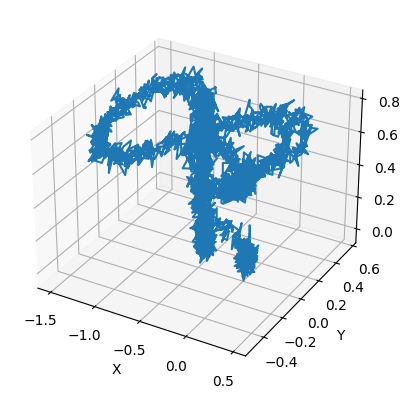

In [122]:
plot_3Dpos(x)

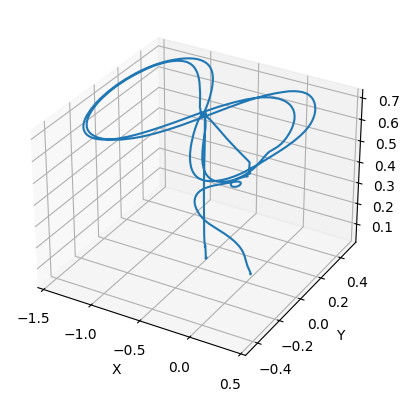

In [123]:
# import mocap data
data_mocap = np.genfromtxt('kalman_filter_data_mocap.txt', delimiter=',', dtype=None, encoding=None)
data_pos_mocap = data_mocap[:,4:]
plot_3Dpos(data_pos_mocap.T)